# **Phase 3**:
# Read Data:



In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline

df = pd.read_csv("Dataset/Preprocessed_data.csv")
df

,FastingBloodSugar,HbA1c,FrequentUrination,Hypertension,ExcessiveThirst,UnexplainedWeightLoss,DiastolicBP,Smoking,SystolicBP,FamilyHistoryDiabetes,Diagnosis
0,0.720868,0.881839,0,0,0,0,0.220339,1,0.033708,1,1
1,0.910763,0.555064,0,0,0,0,0.661017,0,0.842697,0,1
2,0.443775,0.013416,0,0,0,0,0.525424,0,0.325843,1,0
3,0.097133,0.419758,0,0,0,0,0.457627,1,0.887640,1,0
4,0.159161,0.267887,0,0,0,0,0.152542,0,0.842697,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1874,0.306154,0.320241,0,1,1,0,0.237288,0,0.157303,0,0
1875,0.159053,0.555987,0,0,0,0,0.932203,0,0.853933,1,1
1876,0.610593,0.150986,0,0,0,0,0.169492,0,0.426966,0,1
1877,0.708084,0.804516,0,0,0,0,0.525424,0,0.382022,1,1


# Clustering:

In [3]:
# Extract features(X) "excluding the target variable"
X = df.drop('Diagnosis', axis=1)

# Scale the features (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nScaled DataFrame:")
print(scaled_df.head())


Scaled DataFrame:
   FastingBloodSugar     HbA1c  FrequentUrination  Hypertension  \
0           0.759421  1.326985          -0.496005     -0.425462   
1           1.416918  0.201700          -0.496005     -0.425462   
2          -0.199992 -1.663525          -0.496005     -0.425462   
3          -1.400213 -0.264241          -0.496005     -0.425462   
4          -1.185447 -0.787228          -0.496005     -0.425462   

   ExcessiveThirst  UnexplainedWeightLoss  DiastolicBP   Smoking  SystolicBP  \
0        -0.489332              -0.350902    -0.973463  1.597493   -1.603098   
1        -0.489332              -0.350902     0.527391 -0.625981    1.208631   
2        -0.489332              -0.350902     0.065590 -0.625981   -0.587751   
3        -0.489332              -0.350902    -0.165311  1.597493    1.364839   
4        -0.489332              -0.350902    -1.204363 -0.625981    1.208631   

   FamilyHistoryDiabetes  
0               1.787231  
1              -0.559525  
2               

In [4]:
# Evaluate K-means with different values of K
k_values = range(2, 11)  # Test K from 2 to 10 that’s mean more than 3 times
silhouette_scores = []
wss_values = []  # To hold Within-cluster Sum of Squares
# Calculate silhouette score and Calinski-Harabasz score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
    wss = kmeans.inertia_
    
    print(f"K={k}: Silhouette Score = {silhouette_avg:.2f}, WSS = {wss:.2f}")

    silhouette_scores.append(silhouette_avg)
    wss_values.append(kmeans.inertia_)

K=2: Silhouette Score = 0.16, WSS = 16899.86
K=3: Silhouette Score = 0.10, WSS = 15722.31
K=4: Silhouette Score = 0.11, WSS = 14420.85
K=5: Silhouette Score = 0.12, WSS = 13033.02
K=6: Silhouette Score = 0.13, WSS = 11986.12
K=7: Silhouette Score = 0.13, WSS = 11749.09
K=8: Silhouette Score = 0.12, WSS = 11223.59
K=9: Silhouette Score = 0.13, WSS = 10875.64
K=10: Silhouette Score = 0.13, WSS = 10711.55


In [5]:
np.random.seed(42)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(scaled_df)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[-8.47095831e-02 -6.69732114e-02  1.61059085e-02  7.15900342e-02
   2.04360185e+00  1.79256601e-03 -9.78686110e-03  7.84256587e-02
  -3.06984655e-02 -2.29384995e-02]
 [ 2.02833632e-02  1.60364616e-02 -3.85649392e-03 -1.71419409e-02
  -4.89332106e-01 -4.29222600e-04  2.34342387e-03 -1.87787032e-02
   7.35062201e-03  5.49252990e-03]]

Cluster Labels:
[1 1 1 ... 1 1 1]


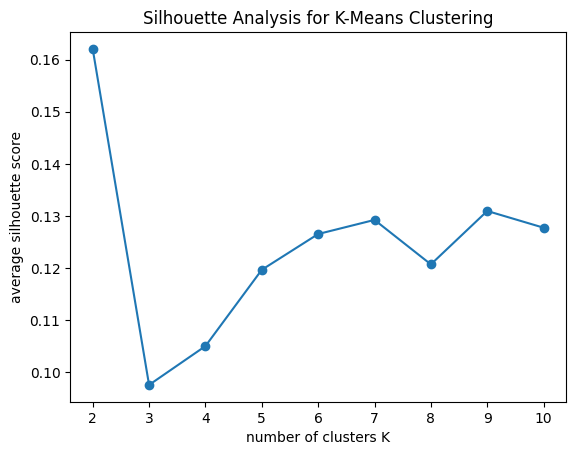

In [7]:
# plotting silhouette score
plt.plot(k_values , silhouette_scores , marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('number of clusters K')
plt.ylabel('average silhouette score')
plt.show()

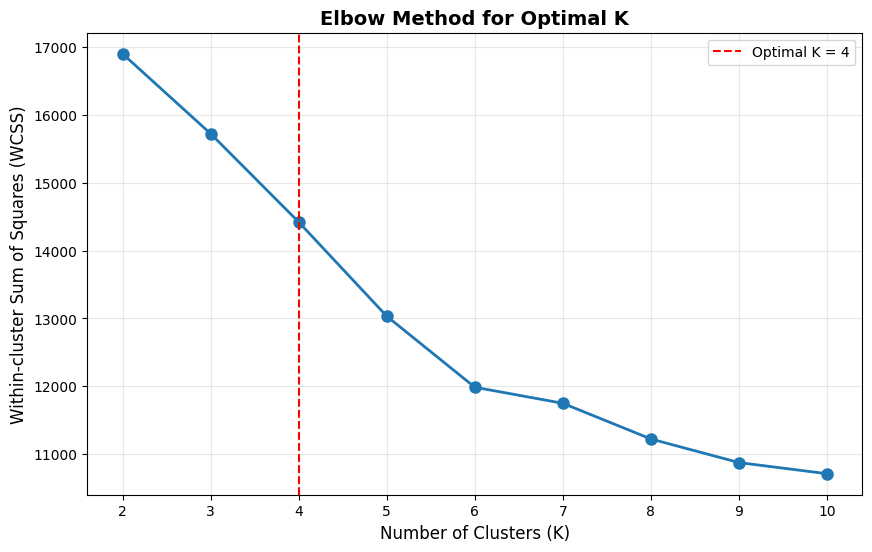

Optimal K based on Elbow Method: 4


In [9]:
# plotting elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)
 # marking the chosen k
optimal_k = 4
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Optimal K = {optimal_k}')
plt.legend()
plt.show()

print(f"Optimal K based on Elbow Method: {optimal_k}")

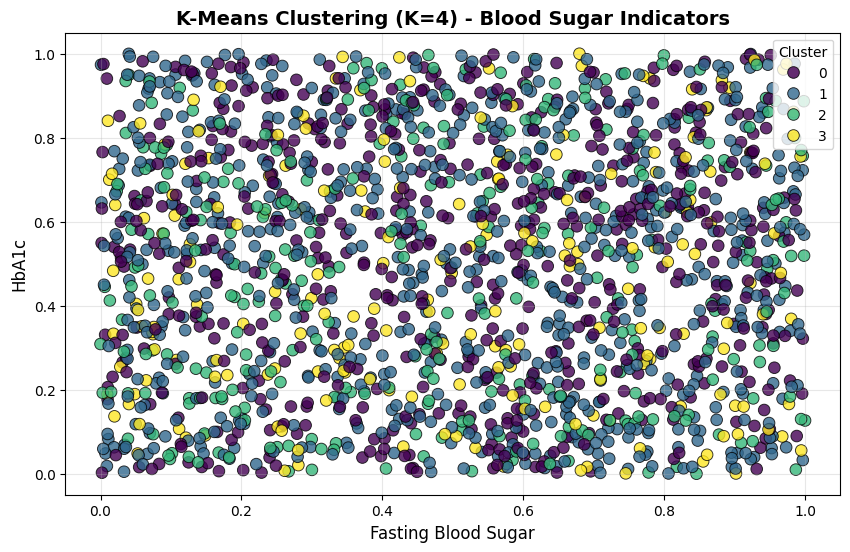

In [10]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(scaled_df)

df['Cluster'] = kmeans.labels_

# 2D Scatter Plot using actual data columns
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='FastingBloodSugar',
    y='HbA1c',
    hue='Cluster',
    palette='viridis',
    alpha=0.8,
    s=70,
    edgecolor='k'
)

plt.title(f"K-Means Clustering (K={optimal_k}) - Blood Sugar Indicators", fontsize=14, fontweight='bold')
plt.xlabel('Fasting Blood Sugar', fontsize=12)
plt.ylabel('HbA1c', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.show()


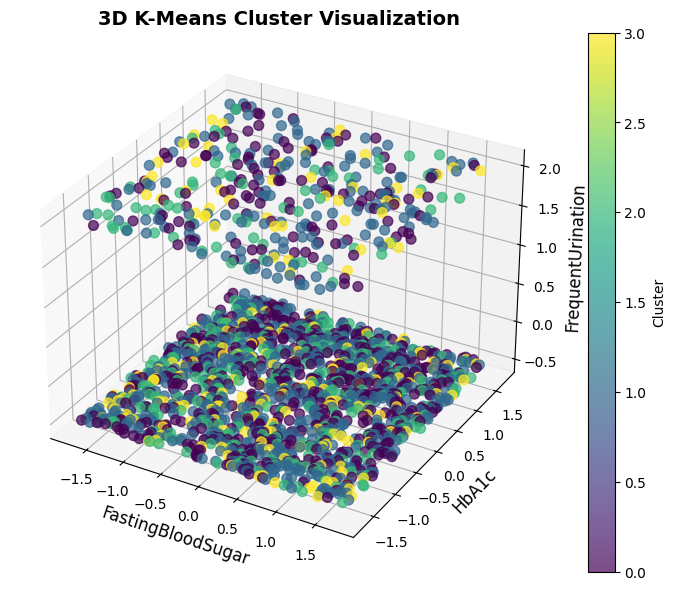

In [11]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(
    scaled_df.iloc[:, 0],  # X-axis feature
    scaled_df.iloc[:, 1],  # Y-axis feature
    scaled_df.iloc[:, 2],  # Z-axis feature
    c=kmeans.labels_,
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Label axes with actual feature names
ax.set_xlabel(scaled_df.columns[0], fontsize=12)
ax.set_ylabel(scaled_df.columns[1], fontsize=12)
ax.set_zlabel(scaled_df.columns[2], fontsize=12)

# Title and colorbar
plt.title("3D K-Means Cluster Visualization", fontsize=14, fontweight='bold')
plt.colorbar(scatter, label="Cluster")
plt.show()

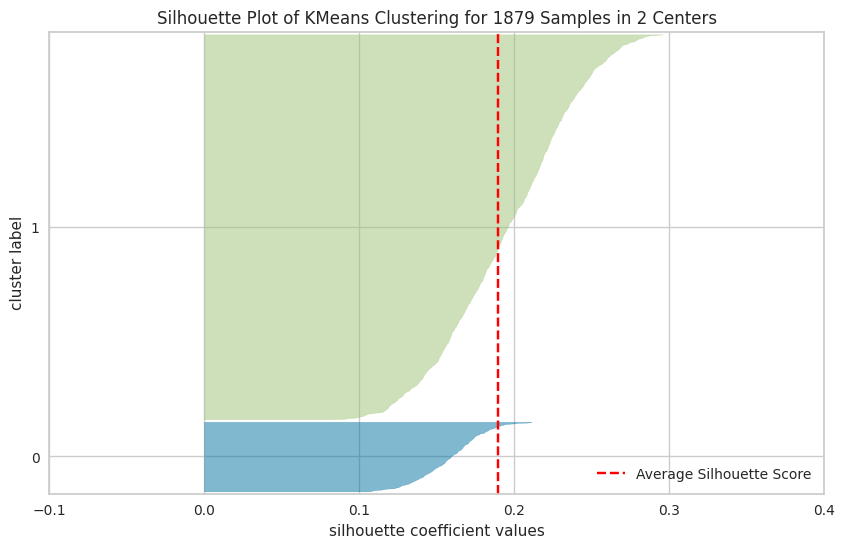

Average Silhouette Score for K=2: 0.1897


In [14]:
plt.rcParams['font.family'] = 'DejaVu Sans'

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Example: K=2
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Create the silhouette plot for K=2
fig, ax = plt.subplots(figsize=(10, 6))

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
visualizer.fit(scaled_df)  # scaled_df should be your preprocessed numeric data
visualizer.show()

# Show the actual average silhouette score
print(f"Average Silhouette Score for K={k}: {visualizer.silhouette_score_:.4f}")


In [15]:
# Evaluate the best models of Clustring
data = {
    "Metric": ["WSS", "Silhouette Score"],
    "K=2": [16899.86, 0.16],
    "K=3": [15722.31, 0.10],
    "K=4": [14420.85, 0.11],
    "K=5": [13033.02, 0.12],
    "K=6": [11986.12, 0.13],
}

# Convert the data into a DataFrame
results_df = pd.DataFrame(data)

results_df.style.set_properties(**{'text-align': 'center'})

,Metric,K=2,K=3,K=4,K=5,K=6
0,WSS,16899.860000,15722.310000,14420.850000,13033.020000,11986.120000
1,Silhouette Score,0.160000,0.100000,0.110000,0.120000,0.130000
